<center><b><font size="5">Выпускной проект: Анализ оттока клиентов в банке</font></b></center>

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Аномальные-значения" data-toc-modified-id="Аномальные-значения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Аномальные значения</a></span></li><li><span><a href="#Пропуски-в-данных" data-toc-modified-id="Пропуски-в-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски в данных</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Типы-данных-столбцов" data-toc-modified-id="Типы-данных-столбцов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Типы данных столбцов</a></span></li><li><span><a href="#Колонки" data-toc-modified-id="Колонки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Колонки</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-клиентов-по-различным-признакам-в-разрезе-оттока" data-toc-modified-id="Распределение-клиентов-по-различным-признакам-в-разрезе-оттока-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение клиентов по различным признакам в разрезе оттока</a></span></li><li><span><a href="#Корреляция" data-toc-modified-id="Корреляция-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Корреляция</a></span></li><li><span><a href="#Портреты-клиентов" data-toc-modified-id="Портреты-клиентов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Портреты клиентов</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

<center><b><font size="4">Дополнительные материалы</font></b></center>

<b><font size="3">Ссылка на презентацию: https://docs.google.com/presentation/d/19TYpreflsGZJTTXlPKrPHq3x7MCDt5Kv/edit?usp=share_link&ouid=116710672781737415280&rtpof=true&sd=true</font></b>

<b><font size="3">Ссылка на дашборд: https://public.tableau.com/app/profile/ivan.ivanov1536/viz/Finalproject_16846586085550/Dashboard1</font></b>

<center><b><font size="4">Загрузка библиотек</font></b></center>

In [1]:
# загрузим необходимые для работы библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats as st
import numpy as np

In [2]:
# сбросим ограничения на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# сбросим ограничения на число столбцов
pd.set_option('display.max_columns', None)
 
# сбросим ограничения на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
# установим стиль графиков и размер фигур
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = (10, 6)

### Предобработка данных

In [ ]:
# загрузим данные в переменную df
df = pd.read_csv('bank.csv')

#### Аномальные значения

In [5]:
# выведем значения столбцов полностью, без сокращений, с 2 знаками после запятой
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Аномалии встречаются в столбцах products. У клиентов не может быть 0 продуктов. Посчитаем, сколько таких клиентов и примем решение, стоит ли их удалять.

In [6]:
df.query('products == 0').shape[0]

1

Лишь 1 клиент имеет 0 продуктов. Удаление не приведет к масштабным изменениям в датасете.

In [7]:
# избавимся от аномальных значений
df.query('products > 0', inplace=True)

In [8]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,9999.00,9999.00,9973.00,9999.00,7705.00,9999.00,9999.00,9999.00,9999.00,9999.00
mean,171817.11,848.69,42.73,2.63,827794.31,1.87,0.68,0.52,147879.17,0.18
std,33709.07,65.44,12.18,1.98,1980614.15,0.79,0.47,0.50,139390.07,0.39
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142809.50,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75252.12,0.00
50%,172740.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119661.51,0.00
75%,201262.50,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174501.12,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


Итак мы избавились от аномальных значений.

#### Пропуски в данных

In [9]:
# просмотрим количество пропусков в датасете 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  EST_SALARY     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


Пропуски встречаются в столбцах age (26 пропусков) и balance (более 2000 пропусков). Пропуски в столбце age можно удалить, так как это не сильно повлияет на распределение возраста. Пропуски в столбце balance нельзя удалять и заменять на 0, так как это сильно скажется на датасете. Оставим эти пропуски без изменений.

In [10]:
# удалим пропуски в столбце age 
df.dropna(subset=['age'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9973 non-null   int64  
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  EST_SALARY     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1012.9+ KB


Теперь пропуски остались только в столбце balance

#### Дубликаты

Выведем количество явных дубликатов в датасете

In [12]:
df.duplicated().sum()

0

Явный дубликатов в датасете нет. Остается проверить неявные дубликаты. Проверять нужно колонку USERID, так как только в ней все значения(клиенты) должны быть уникальными.

In [13]:
# выведем количество дубликатов столбца USERID
df['USERID'].duplicated().sum()

50

Итого мы имеем 50 явных дубликата id пользователей. Выведем на экран записи с дублирующими id.

In [14]:
# создадим список дублирующихся id пользователей
user_id = df[df['USERID'].duplicated()]['USERID'].unique()

In [15]:
# выведем на экран записи с дублирующимися записями
df.query('USERID in @user_id').sort_values(by='USERID')

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1
5896,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,146427.96,0
1411,123461,829.00,Ярославль,Ж,59.00,0,96222.44,2,0,1,102771.55,1
8638,123461,934.00,Рыбинск,М,34.00,0,NaN,2,1,0,291619.27,0
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0
8164,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1


Как видно из данных, дублирующиеся id имеют пользователи из разных городов (Ярославль и Рыбинск), также пользователи имеют разный пол. Предположение о том, что это одни и те же пользователи в разный период времени - нельзя. Проще всего удалить 50 записей, что не сильно отразится на датасете.

In [16]:
# удалим из датасета записи с дублирующимся id пользователей
df.drop_duplicates(subset='USERID', inplace=True)

In [17]:
# проверим количество дубликатов в столбце после удаления
df['USERID'].duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  EST_SALARY     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1007.8+ KB


Итого мы удалили 50 записей с дубликатами из исходного датасета.

#### Типы данных столбцов

In [19]:
# выведем типы данных столбцов 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  EST_SALARY     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1007.8+ KB


Есть лишь один столбец с неправильным типом данных - age. Заменим тип данных float на int

In [20]:
df['age'] = df['age'].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int32  
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  EST_SALARY     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 969.0+ KB


Теперь все столбцы имеют верный тип данных.

#### Колонки

Необходимо привести колонки к нижнему регистру.

In [22]:
df.columns = df.columns.str.lower()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9923 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9923 non-null   int64  
 1   score          9923 non-null   float64
 2   city           9923 non-null   object 
 3   gender         9923 non-null   object 
 4   age            9923 non-null   int32  
 5   equity         9923 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9923 non-null   int64  
 8   credit_card    9923 non-null   int64  
 9   last_activity  9923 non-null   int64  
 10  est_salary     9923 non-null   float64
 11  churn          9923 non-null   int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 969.0+ KB


Все колонки приведены к правильному формату.

#### Промежуточный вывод

В ходе предобработки данных были выполнены следющие действия:
   - удален клиент с одним продуктом;
   - пропуски в столбце age удалены, а в столбце balance остались без изменений, так как это может повлиять распределение и анализ в будущем;
   - удалены дубликаты в столбце id пользователей в связи с их незначительным числом;
   - данные приведены к нужному типу;
   - названия колонок приведены к правильному формату.

Теперь датасет готов к исследовательскому анализу.

### Исследовательский анализ данных

#### Распределение клиентов по различным признакам в разрезе оттока

Создадим функцию для построения графиков нормированной гистограммы по различным признакам в разрезе оттока.

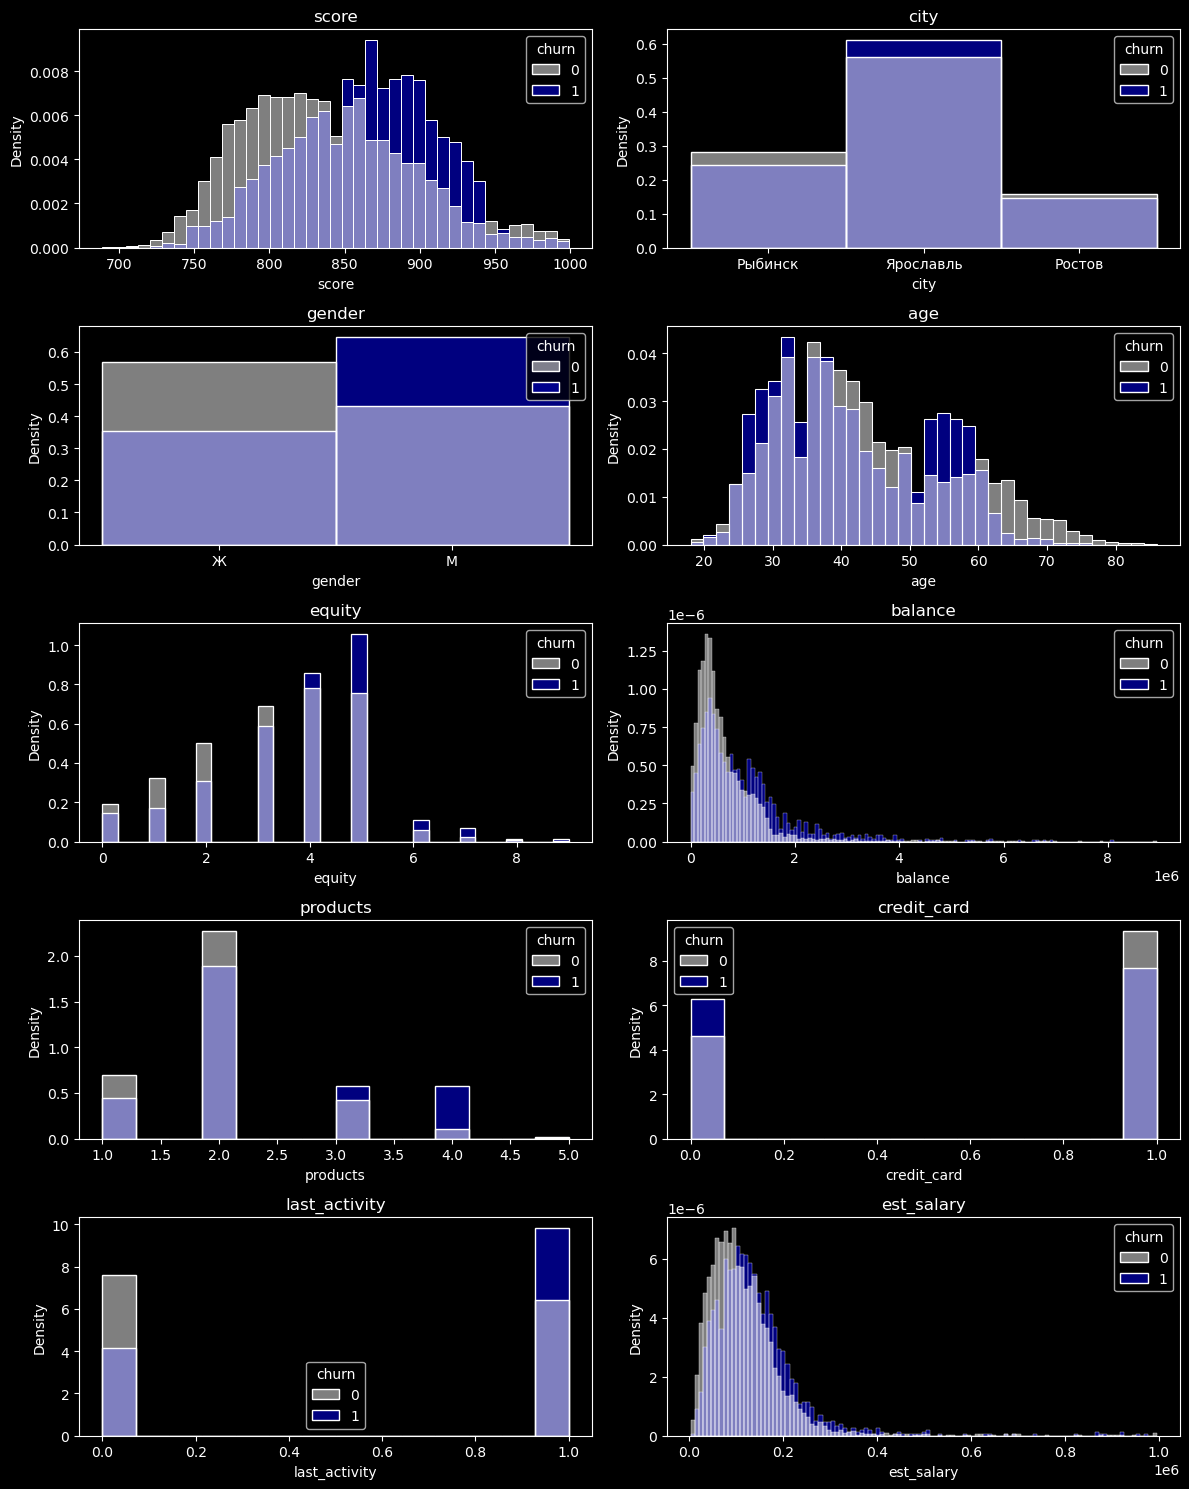

In [24]:
def sns_hist(data):
    # создадим сетку графиков
    num_rows = len(data.columns[1:-1])//2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 15))
    # приведем переменную axes к одномерному массиву для удобства
    axes = axes.flatten()

    # создадим цикл для рисования гистограммы для каждого столбца
    for i, column in enumerate(data.columns[1:-1]):
        sns.histplot(data, x=column, hue='churn', stat='density', common_norm=False, palette='flag', ax=axes[i])
        # в качестве названия гистограммы - название столбца
        axes[i].set_title(column)

    # выведем графики на экран
    plt.tight_layout()
    plt.show()

# применим функцию к нашему датасету, но для удобства уберем выбросы из графиков
sns_hist(df.query('balance <= 10000000 and est_salary <= 1000000'))

По данным графикам можно выделить отточные категории клиентов по различным признакам.

Баллы кредитного скоринга:
- 830-910;
- 930-940.

Город: 
- Ярославль.

Пол:
- мужчины.

Возраст:
- 25-35;
- 50-60.

Приблизительная оценка собственности клиента:
- от 3.

Баланс:
- от 1 млн.

Количество продуктов:
- от 2.

Кредитная карта:
- отсутствует.

Был ли клиент активен в последнее время:
- был.

Оценочная з/п:
- от 100 000.

#### Корреляция

Построим матрицу корреляции для определения признаков, которые сильнее всего влияют на отток. Возьмем тольо те столбцы, которые могут повлиять на отток.

In [25]:
phik_overview = df.drop('userid', axis=1).phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
score,1.00,0.09,0.07,0.04,0.53,0.17,0.42,0.21,0.05,0.39,0.23
city,0.09,1.00,0.01,0.09,0.06,0.04,0.13,0.07,0.03,0.17,0.02
gender,0.07,0.01,1.00,0.28,0.06,0.05,0.07,0.20,0.01,0.14,0.22
age,0.04,0.09,0.28,1.00,0.04,0.02,0.14,0.16,0.09,0.36,0.18
equity,0.53,0.06,0.06,0.04,1.00,0.00,0.58,0.22,0.05,0.29,0.35
balance,0.17,0.04,0.05,0.02,0.00,1.00,0.00,0.00,0.00,0.37,0.02
products,0.42,0.13,0.07,0.14,0.58,0.00,1.00,0.27,0.11,0.22,0.26
credit_card,0.21,0.07,0.20,0.16,0.22,0.00,0.27,1.00,0.05,0.04,0.20
last_activity,0.05,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.04,0.26
est_salary,0.39,0.17,0.14,0.36,0.29,0.37,0.22,0.04,0.04,1.00,0.05


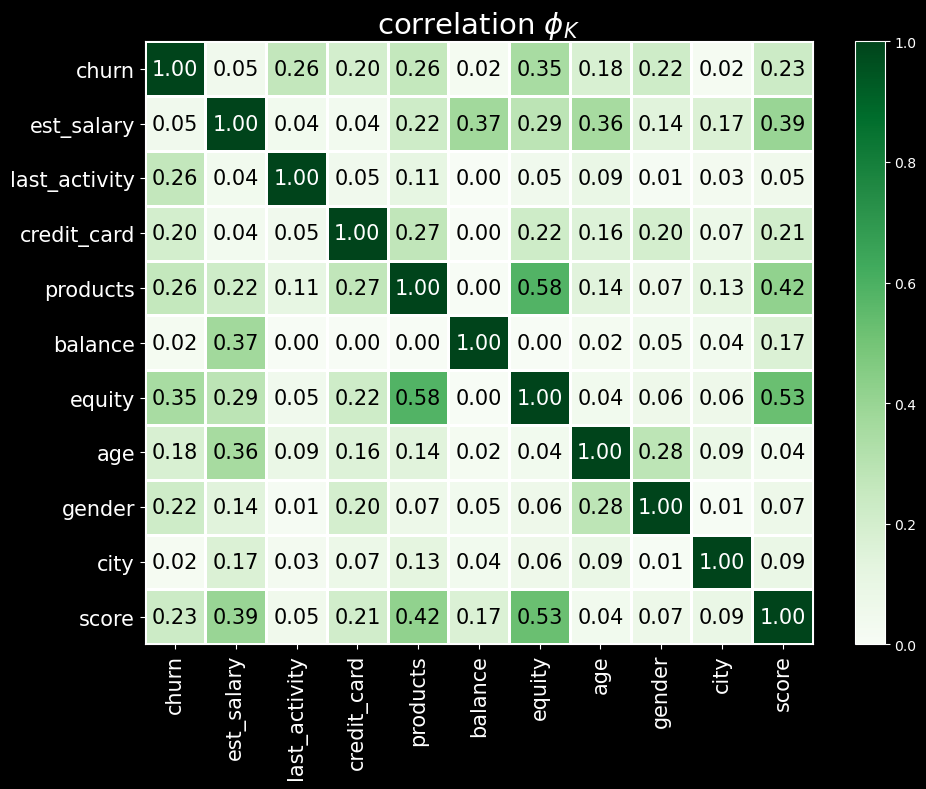

In [26]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

На отток влияют следующие показатели:
- был ли клиент активен в последнее время;
- наличие кредитной карты;
- количество продуктов;
- приблизительная оценка собственности клиента (влияет сильнее всего);
- возраст;
- пол;
- баллы кредитного скоринга.

#### Портреты клиентов

Для составления портретов уходящих клиентов будем комбинировать по 2 признака, при этом главным условием будет являться количество клиентов, подходящих под данный потрет, примерно от 500 до 2000, и процент оттока не меньше значения по всему датасету.

Посчитаем процент уходящих клиентов во всем датасете.

In [36]:
percent_churn = round(df.query('churn == 1').shape[0]/df.shape[0]*100)
print(f'Процент уходящих пользователей составляет: {percent_churn}')

Процент уходящих пользователей составляет: 18


In [28]:
# составим запросы для каждого признака
query1 = 'score >= 830 and score <= 910'
query2 = 'score >= 930 and score <= 940'
query3 = 'est_salary >= 100000'
query4 = 'city == "Ярославль"'
query5 = 'gender == "М"'
query6 = 'age >= 25 and age <= 35'
query7 = 'age >= 50 and age <= 60'
query8 = 'equity >= 3'
query9 = 'balance >= 1000000'
query10 = 'products >= 2'
query11 = 'credit_card == 0'
query12 = 'last_activity == 1'

# поместим их в список для последующей комбинации
queries = [query1, 
          query2,
          query3,
          query4,
          query5,
          query6,
          query7,
          query8,
          query9,
          query10,
          query11, 
          query12]

In [29]:
# скомбинируем все признаки между собой по 2 
query_combinations = list(itertools.combinations(queries, 2))

In [30]:
# создадим пустой список комбинаций
combination_list = []

# напишем цикл перебора комбинаций и их фильтрации
for combination in query_combinations:
    # задаем минимальное и максимальное число клиентов данной категории
    min_number = 500
    max_number = 2000
    
    # занесем общее количество клиентов данной категории в переменную combination_total
    combination_total = df.query(combination[0] + 'and ' + combination[1]).shape[0]
    
    # занесем общее количество уходящих клиентов данной категории в переменную combination_churn
    combination_churn = df.query(combination[0] + 'and ' + combination[1] + 'and churn == 1').shape[0]
    
    # для нахождения процента уходящих в данной категории уберем категории с 0 пользователей
    if combination_total != 0:
        combination_percent_churn = round(combination_churn/combination_total*100, 2)
    
    # отфильтруем категории
    if (combination_total >= min_number 
    and combination_total <= max_number
    and  combination_percent_churn >= percent_churn):
        
        #занесем результат в переменную combination_list в виде списка
        combination_list.append([combination, combination_total, combination_percent_churn])

In [31]:
# на основе полученного списка создадим датафрейм с колонками 'features', 'total' и 'churn_percent'
combination_df = pd.DataFrame(combination_list, columns=['features', 'total', 'churn_percent'])
combination_df

,features,total,churn_percent
0,"(score >= 830 and score <= 910, age >= 25 and age <= 35)",1366,29.87
1,"(score >= 830 and score <= 910, age >= 50 and age <= 60)",759,33.20
2,"(score >= 830 and score <= 910, balance >= 1000000)",876,45.21
3,"(score >= 830 and score <= 910, credit_card == 0)",1579,32.93
4,"(est_salary >= 100000, age >= 25 and age <= 35)",1556,25.58
5,"(est_salary >= 100000, age >= 50 and age <= 60)",963,26.69
6,"(est_salary >= 100000, balance >= 1000000)",1405,43.42
7,"(est_salary >= 100000, credit_card == 0)",1884,29.78
8,"(city == ""Ярославль"", age >= 25 and age <= 35)",1904,23.21
9,"(city == ""Ярославль"", age >= 50 and age <= 60)",955,27.43


Итого нашли 29 комбинаций признаков уходящих клиентов. Оставим топ-15 по оттоку.

In [32]:
combination_df_t15 = combination_df.sort_values(by='churn_percent', ascending=False).head(15)
combination_df_t15

,features,total,churn_percent
27,"(balance >= 1000000, last_activity == 1)",983,52.29
14,"(gender == ""М"", balance >= 1000000)",973,49.02
2,"(score >= 830 and score <= 910, balance >= 1000000)",876,45.21
26,"(balance >= 1000000, credit_card == 0)",896,44.08
6,"(est_salary >= 100000, balance >= 1000000)",1405,43.42
10,"(city == ""Ярославль"", balance >= 1000000)",1144,41.61
25,"(balance >= 1000000, products >= 2)",1670,41.14
24,"(equity >= 3, balance >= 1000000)",1734,39.33
20,"(age >= 50 and age <= 60, equity >= 3)",1030,35.83
18,"(age >= 25 and age <= 35, credit_card == 0)",826,35.71


Таким образом, мы нашли портреты клиентов, наиболее склонных к уходу. К таким относятся:
- клиенты с балансом >= 1 млн. и активностью в последнее время;
- мужчины с балансом >= 1 млн.;
- клиенты с кредитным рейтингом от 830 до 910 включительно и балансом >= 1 млн.;
- клиенты с балансом >= 1 млн. и без кредитной карты;
- клиенты с оценочной з/п >= 100000 и балансом >= 1 млн.;
- клиенты из Ярославля с балансом >= 1 млн.;
- клиенты с балансом >= 1 млн. и >= 2 продуктами;
- клиенты с оценкой собственности >= 3 и балансом >= 1 млн.;
- клиенты от 50 до 60 лет включительно и оценкой собственности >= 3;
- клиенты от 25 до 35 лет включительно без кредитной карты;
- клиенты от 50 до 60 лет включительно без кредитной карты;
- мужчины без кредитной карты;
- клиенты без кредитной карты и активностью в последнее время;
- мужчины от 50 до 60 лет включительно;
- клиенты с кредитным рейтингом от 830 до 910 включительно от 50 до 60 лет включительно.

### Проверка статистических гипотез

#### Гипотеза 1

Формулировка гипотезы: доходы ушедших и оставшихся клиентов различаются.

<b>H0</b>: Между доходами ушедших и оставшихся клиентов нет разницы

<b>H1</b>: Между доходами ушедших и оставшихся клиентов есть разница

Возьмем alpha = 0.05

In [34]:
# зададим уровень статистической значимости
alpha = 0.05 

# зададим 2 выборки (з/п оставшихся и ушедших клиентов)

sample_1 = df.query('churn == 0')['est_salary']
sample_2 = df.query('churn == 1')['est_salary']

# проведем t тест
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8626784591490475
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, следовательно нельзя утверждать о наличии разницы доходов между ушедшими и оставшимися клиентами.

#### Гипотеза 2

Формулировка гипотезы: возраст ушедших и оставшихся клиентов различается.

<b>H0</b>: Между возрастом ушедших и оставшихся клиентов нет разницы

<b>H1</b>: Между возрастом ушедших и оставшихся клиентов есть разница

Возьмем alpha = 0.05

In [35]:
# зададим 2 выборки (возрасты оставшихся и ушедших клиентов)

sample_1 = df.query('churn == 0')['age']
sample_2 = df.query('churn == 1')['age']

# проведем t тест
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.430740947372699e-08
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергается. Следовательно, можно полагать, что между ушедшими и оставшимися клиентами есть разница в возрасте.

### Общий вывод

В результате выполнения проекта была выполнена предобработка данных, в ходе которой были удалены аномалии в датасете, дубликаты, заменены или оставлены пропуски в данных, столбцы приведены к правильному типу данных и формату названий.

Корреляция зависимости оттока от признаков показала, что уход клиента в первую очередь зависит от:
- приблизительной оценки собственности клиента (0.35);
- количества продуктов (0.26);
- был ли клиент активен в последнее время (0.26);
- баллов кредитного скоринга (0.23);
- пола (0.22);
- наличия кредитной карты (0.2);
- возраста (0.18).

В ходе анализа главной задачи выделены топ-15 сегментов клиентов по оттоку. К ним относятся: 
- клиенты с балансом >= 1 млн. и активностью в последнее время;
- мужчины с балансом >= 1 млн.;
- клиенты с кредитным рейтингом от 830 до 910 включительно и балансом >= 1 млн.;
- клиенты с балансом >= 1 млн. и без кредитной карты;
- клиенты с оценочной з/п >= 100000 и балансом >= 1 млн.;
- клиенты из Ярославля с балансом >= 1 млн.;
- клиенты с балансом >= 1 млн. и >= 2 продуктами;
- клиенты с оценкой собственности >= 3 и балансом >= 1 млн.;
- клиенты от 50 до 60 лет включительно и оценкой собственности >= 3;
- клиенты от 25 до 35 лет включительно без кредитной карты;
- клиенты от 50 до 60 лет включительно без кредитной карты;
- мужчины без кредитной карты;
- клиенты без кредитной карты и активностью в последнее время;
- мужчины от 50 до 60 лет включительно;
- клиенты с кредитным рейтингом от 830 до 910 включительно от 50 до 60 лет включительно.

В качестве рекомендация для удержания сегментов клиентов, чаще подверженных оттоку, можно предложить следующее:
- для активных клиентов - новые карты с наличием скидки или кэшбэка при оплате товаров у партнеров банка;
- для клиентов с высоким кредитным рейтингом - более высокие суммы кредита с низкими процентами, упрощение способа получения кредита (возможно прямо из мобильного приложения);
- клиентам без кредитной карты - кредитные карты с выгодными условиями;
- клиентам с оценочной з/п более 100 тыс. - предложение открытия накопительного счета с высокими процентами годовых или же вохможность получения кэшбэка или скидки у партнеров при оплате картой банка;
- клиентам с более чем 2 банковскими продуктами - дополнительные бонусы для этих продуктов, такие как повышенный кэшбэк или снижение стоимости обслуживания данных продуктов;
- клиентам с оценкой собственности более 3 - предложения о возможности страхования собственности в банке по выгодным условиям;
- клиентам от 50 до 60 лет - кэшбэк при оплате бензина, покупке билетов как авиа, так и жд. Высокие процентные ставки по пенсионному вкладу. 
- клиентам от 25 до 35 лет - повышенный кэшбэк в заведениях общественного питания, кинотеатрах, театрах, музеях и других местах отдыха. Также возможность взятия ипотеки на большой срок под маленький процент или кредита;
- для клиентов мужского пола - кэшбэк на покупки в магазинах рыболовных товаров, охотничьих магазинах. Предложение кредита на покупку транспорта, как наземного, так и водного. 